In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_localize('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
#cheetah.head()
cheetah.index.name="date"
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
date,,,,,,,,,,,,,,,,,,,,,
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row. 

In [4]:
if len(strava.dropna())==len(strava):
    print("No null values")
else:
    print("Found")
print("Number of instances in Cheetah dataset: {}".format(len(cheetah)))
print("Number of instances in Strava dataset: {}".format(len(strava)))

Found
Number of instances in Cheetah dataset: 251
Number of instances in Strava dataset: 268


# <u>Joining cheetah and strava dataset using index</u>

In [5]:
data=strava.join(cheetah,how='inner')

if len(strava.dropna())==len(strava):
    print("No null values")
else:
    print("Found")
#print(len(data))
print(data.head(2))

Found
                           average_heartrate  average_temp  average_watts  \
date                                                                        
2018-01-27 19:39:49+00:00              120.6          21.0          153.4   
2018-01-27 20:01:32+00:00              146.9          22.0          187.7   

                          device_watts  distance  elapsed_time elevation_gain  \
date                                                                            
2018-01-27 19:39:49+00:00         True       7.6            17        95.00 m   
2018-01-27 20:01:32+00:00         True      38.6            67       449.00 m   

                           kudos  moving_time workout_type   ...    Rest AVNN  \
date                                                         ...                
2018-01-27 19:39:49+00:00      4           17         Ride   ...            0   
2018-01-27 20:01:32+00:00     19           67         Race   ...            0   

                          Rest SDNN

##  Feature list of Joined dataset

In [6]:
for i in data.columns:
    print(i)

average_heartrate
average_temp
average_watts
device_watts
distance
elapsed_time
elevation_gain
kudos
moving_time
workout_type
date
time
filename
axPower
aPower Relative Intensity
aBikeScore
Skiba aVI
aPower Response Index
aIsoPower
aIF
aBikeStress
aVI
aPower Efficiency Factor
aBikeStress per hour
Aerobic Decoupling
Power Index
Activities
To Exhaustion
Elapsed Time
Duration
Time Moving
Time Carrying (Est)
Elevation Gain Carrying (Est)
Distance
Climb Rating
Athlete Weight
Athlete Bodyfat
Athlete Bones
Athlete Muscles
Athlete Lean Weight
Athlete Bodyfat Percent
Elevation Gain
Elevation Loss
Work
Average Speed
Average Power
Average SmO2
Average tHb
Average aPower
Nonzero Average Power
Average Heart Rate
Average Core Temperature
Heartbeats
HrPw Ratio
Workbeat stress
Watts:RPE Ratio
Power Percent of Max
HrNp Ratio
Average Cadence
Average Temp
Max Power
Max SmO2
Max tHb
Min SmO2
Min tHb
Max Heartrate
Min Heartrate
Max Core Temperature
Max Speed
Max Cadence
Max Temp
Min Temp
95% Heartrate
VAM


# Required Analysis(Tasks)

_Task 1_. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides

_Task2_.  Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 

_Task 3_. Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain

_Task 4_. We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).


## <u>Commutes or MTB rides</u>
### - Task1(Removing rides with no measured power)

In [7]:
##Task1->Removing rides with no measured power
x=data[pd.Series(data.device_watts.fillna("False"),dtype=bool)]#Ignored tuples with nan as value for device_watts by filling it with false values
print(x.head(5))

                           average_heartrate  average_temp  average_watts  \
date                                                                        
2018-01-27 19:39:49+00:00              120.6          21.0          153.4   
2018-01-27 20:01:32+00:00              146.9          22.0          187.7   
2018-02-05 21:06:42+00:00              119.3          19.0          165.9   
2018-02-07 06:59:05+00:00              124.8          20.0          151.0   
2018-02-09 19:18:03+00:00              123.0          20.0          145.9   

                          device_watts  distance  elapsed_time elevation_gain  \
date                                                                            
2018-01-27 19:39:49+00:00         True       7.6            17        95.00 m   
2018-01-27 20:01:32+00:00         True      38.6            67       449.00 m   
2018-02-05 21:06:42+00:00         True      24.3            69       439.00 m   
2018-02-07 06:59:05+00:00         True      47.1       

## <b><u>Data Distribution</u></b>
### - Task2(Checking whether the data is Normally distributed or skew)

Text(0.5,1,'Average Power')

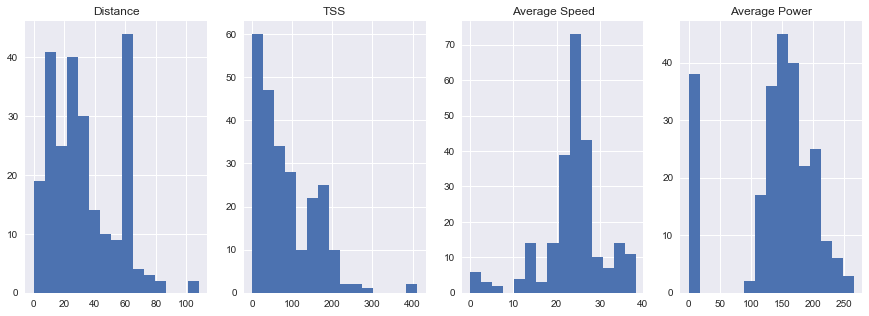

In [8]:
fig,sub_plot = plt.subplots(1,4,figsize=(15,5))
#print(sub_plot)
n=int(np.sqrt(len(data)))#number of  bins
sub_plot[0].hist(data["Distance"],bins=n)
sub_plot[0].set_title(label="Distance")
sub_plot[1].hist(data["TSS"],bins=n)
sub_plot[1].set_title(label="TSS")
sub_plot[2].hist(data["Average Speed"],bins=n)
sub_plot[2].set_title(label="Average Speed")
sub_plot[3].hist(data["Average Power"],bins=n)
sub_plot[3].set_title(label="Average Power")

### Distributions of some key variables: time, distance, average speed, average power, TSS. 

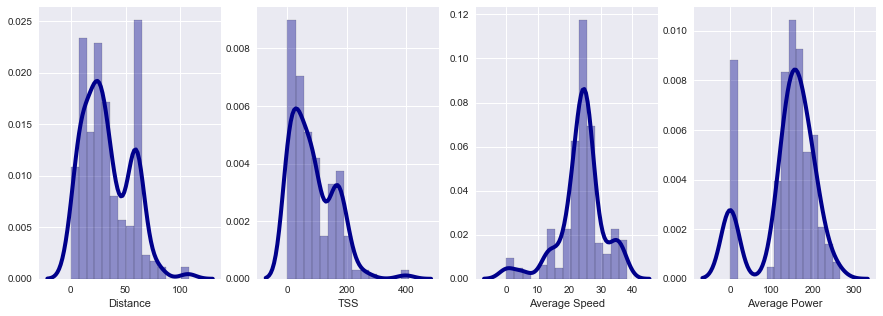

In [9]:
fig,sub_plot = plt.subplots(1,4,figsize=(15,5))
sns.distplot(data['Distance'], hist=True, kde=True, 
             bins=int(n), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax=sub_plot[0])
sns.distplot(data['TSS'], hist=True, kde=True, 
             bins=int(n), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax=sub_plot[1])
sns.distplot(data['Average Speed'], hist=True, kde=True, 
             bins=int(n), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax=sub_plot[2])
sns.distplot(data['Average Power'], hist=True, kde=True, 
             bins=int(n), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax=sub_plot[3])

__Observation__: Distributions of all the features- Distance, TSS, Average Speed and Average Power are multimodal. We can come to conclusion None of them are normally distributed. 

## Identifying Relationship between variables
### -Task3(Constructing a correlation matrix and pairwise plot)

In [10]:
#3 construct a correlation matrix
features=['Distance','Time Moving','Average Speed','average_heartrate','NP','TSS','Elevation Gain']
print(data[features].corr())

                   Distance  Time Moving  Average Speed  average_heartrate  \
Distance           1.000000     0.919503       0.354867           0.139224   
Time Moving        0.919503     1.000000       0.069329          -0.048245   
Average Speed      0.354867     0.069329       1.000000           0.550812   
average_heartrate  0.139224    -0.048245       0.550812           1.000000   
NP                 0.347356     0.123754       0.707347           0.375199   
TSS                0.880134     0.780089       0.340263           0.162631   
Elevation Gain     0.778807     0.813204       0.062132           0.058415   

                         NP       TSS  Elevation Gain  
Distance           0.347356  0.880134        0.778807  
Time Moving        0.123754  0.780089        0.813204  
Average Speed      0.707347  0.340263        0.062132  
average_heartrate  0.375199  0.162631        0.058415  
NP                 1.000000  0.591343        0.124392  
TSS                0.591343  1.000000  

In [11]:
x=data[features].corr()
print("Positively Correlated variables:\n\n",)
for i in range(len(features)):
    for j in range(i+1,len(features)):
        if x.iloc[i,j]>0:
            print(" Correlation btw {} and {} is {} ".format(features[i],features[j],x.iloc[i,j]))

Positively Correlated variables:


 Correlation btw Distance and Time Moving is 0.9195033942781474 
 Correlation btw Distance and Average Speed is 0.35486703472853287 
 Correlation btw Distance and average_heartrate is 0.13922400518213576 
 Correlation btw Distance and NP is 0.34735594864666686 
 Correlation btw Distance and TSS is 0.8801337804927419 
 Correlation btw Distance and Elevation Gain is 0.7788070313202515 
 Correlation btw Time Moving and Average Speed is 0.06932900122947572 
 Correlation btw Time Moving and NP is 0.1237544998664807 
 Correlation btw Time Moving and TSS is 0.7800891883867738 
 Correlation btw Time Moving and Elevation Gain is 0.8132038928398791 
 Correlation btw Average Speed and average_heartrate is 0.5508116699437253 
 Correlation btw Average Speed and NP is 0.7073470113062059 
 Correlation btw Average Speed and TSS is 0.34026269300718565 
 Correlation btw Average Speed and Elevation Gain is 0.06213244024365521 
 Correlation btw average_heartrate and NP i

['Distance', 'Time Moving', 'Average Speed', 'average_heartrate', 'NP', 'TSS', 'Elevation Gain']


c:\users\tarun\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


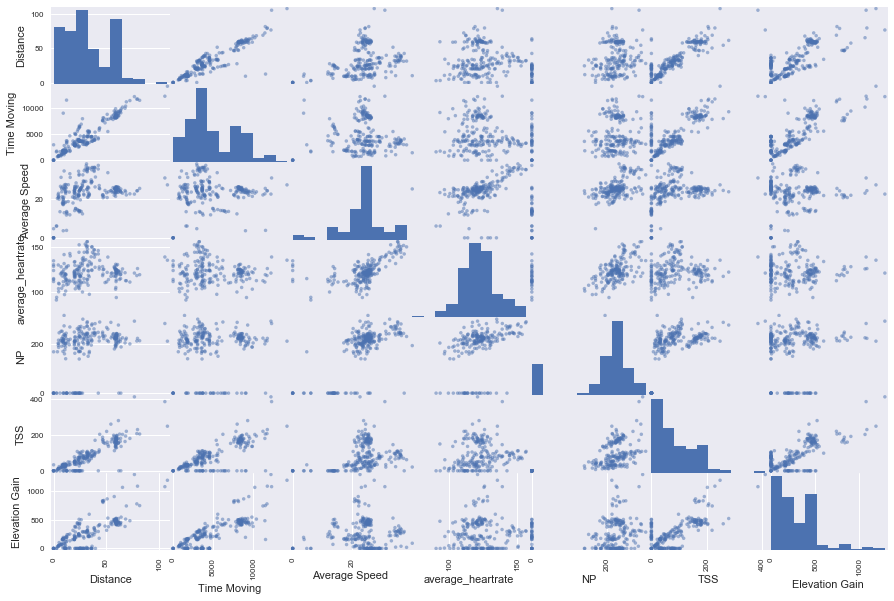

In [44]:
print(features)
z=pd.scatter_matrix(data[features],figsize=(15,10))
#g = sns.pairplot(data,vars=features)
plt.show()

__Observation__: From the above scatter matrix it is evident that 
 - The feature Distance and Time moving are positively correlated to each other. 
 - The feature Distance and Average speed have a random distribution. It may or may not be positively correlated but they are not definitely negatively correlated to each other.
 - The feature Distance and Average Heartrate also seems to have a random distribution. It is evident that they are either non related or very less positively correlated in terms of magnitude.
 - The feature Distance and NP are randomly distributed. It may or may not be positively correlated but they are not definitely negatively correlated to each other.
 - The feature Distance and TSS are positively correlated to each other. The distribution of feature Distance changes along with the feature TSS in a predictable way.
 - The feature Distance and Elevation gain are positively correlated to each other. The distribution of feature Distance changes along with the feature Elevation gain in a predictable way.
 - The feature Time moving and Average speed also seems to have a random distribution. It is evident that they are either non related or very less positively correlated in terms of magnitude.
 - The feature Time moving and NP seems to have a random distribution. It is evident that they are either non related or very less positively correlated in terms of magnitude.
 -  The feature Time moving and TSS are positively correlated to each other. The distribution of feature Distance changes along with the feature TSS in a predictable way.
 -  The feature Time moving and Elevation Gain are positively correlated to each other. The distribution of feature Distance changes along with the feature TSS in a predictable way.
 -  The feature Average Speed and NP are positively correlated to each other. The distribution of feature Distance changes along with the feature TSS in a predictable way.

## <u>Task4 (Data analysis using Boxplots and scatter plot)</u>

In [13]:
x=list(data.workout_type)
print(x)

['Ride', 'Race', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Race', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Race', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Race', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Race', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Race', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Workout', 'Ride', 'Ride', 'Ride', 'Workout', 'Ride', 'Ride', 'Race', 'Workout', 'Ride', 'Ride', 'Ride', 'Race', 'Workout', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Workout', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Race', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Workout', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Race', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Workout', 'Workout', 'Ride', 'Workout', 'Workout', 'Ride', 'Ride', 'Race', 'Workout', 'Ride', 'Ride', 'Race', 'Ride', 'Ride', 'Race', 'Workout', 'Workout', 'Ride', 'Ride', 

In [14]:
Race=data[data.workout_type=="Race"]
Ride=data[data.workout_type=="Ride"]
work=data[data.workout_type=="Workout"]

Figure(432x288)


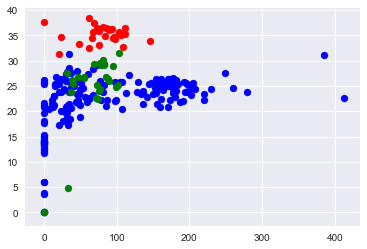

In [15]:
g, ax= plt.subplots(1,1)
print(g)
ax.scatter(Race.TSS,Race["Average Speed"],c='r')
ax.scatter(Ride.TSS,Ride["Average Speed"],c='b')
ax.scatter(work.TSS,work["Average Speed"],c='g')

In [16]:
def plot_scatter(i,j,r,c,ax):
    ax[r,c].scatter(Race[scatter_feat[i]],Race[scatter_feat[j]],c='r')
    ax[r,c].scatter(Ride[scatter_feat[i]],Ride[scatter_feat[j]],c='b')
    ax[r,c].scatter(work[scatter_feat[i]],work[scatter_feat[j]],c='g')
    #ax[r,c].set_title("Workout distribution")
    ax[r,c].set_xlabel(scatter_feat[i])
    ax[r,c].set_ylabel(scatter_feat[j])
    ax[r,c].legend(['Race', 'Ride','Workout'])
    
    

### Relationships between variables-Distance, Moving Time, Average Speed, Heart Rate, Power (watts), Normalised power (NP), Training Stress Score, Elevation Gain

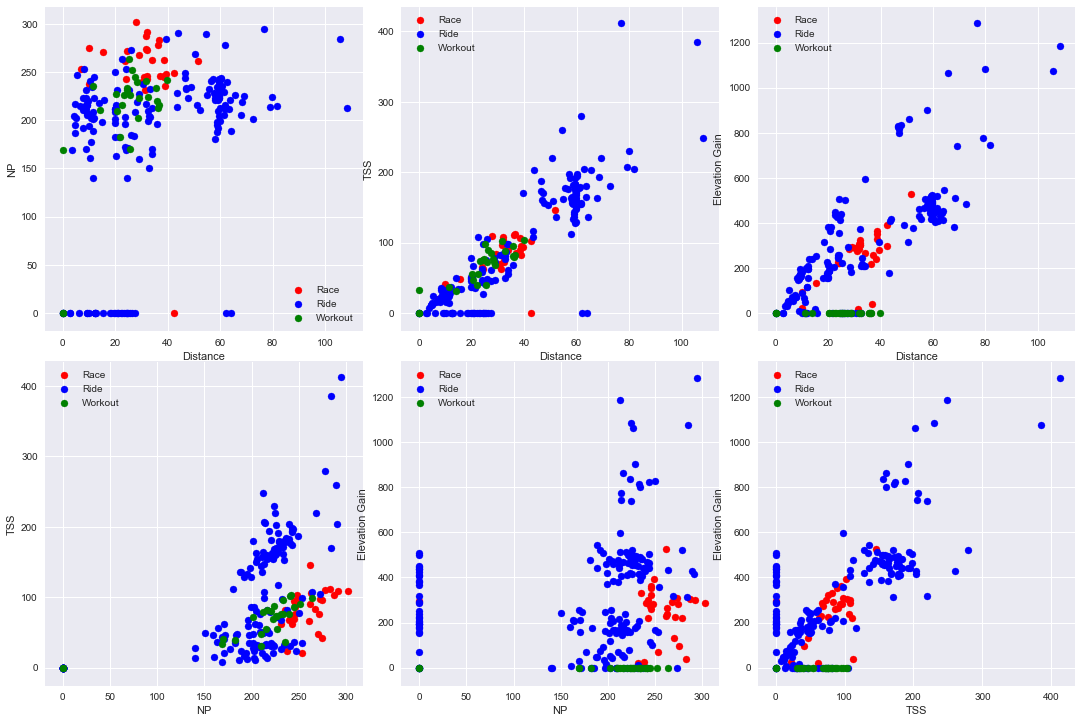

In [17]:
scatter_feat=['Distance','NP','TSS','Elevation Gain']
#plt.figure(figsize=(51,51))
fig,ax=plt.subplots(2,3,figsize=(15, 10))
plt.tight_layout() 
#print(ax)
r=0;c=0;
for i in range(len(scatter_feat)):
    for j in range(i+1,len(scatter_feat)):
        plot_scatter(i,j,r,c,ax)
        c+=1
        if c==3:
            c=0;
            r+=1

__Observation__:

- The distribution of TSS vs Distance graph varies in predictable manner. It is evident from the distribution that both are positively correlated to each other. There are few instances in _Ride_ class that has no TSS value. 
- The distribution of Elevation Gain vs Distance graph varies in predictable manner. It is evident from the distribution that both are positively correlated to each other. There are no instances in _Workout_ class which has Elevation Gain varying with Distance.
- The distribution of Elevation Gain vs TSS graph varies in predictable manner. It is evident from the distribution that both are positively correlated to each other. There are no instances in _Workout_ class which has Elevation Gain varying with TSS. It is also evident that some of instances in _Ride_ class whose Tss does not vary with Elevation Gain.

### Box plots to visualise the different distributions of a variable for the three categories.

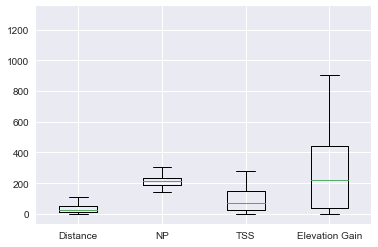

In [18]:
# Box plot
feat=['Distance','NP','TSS','Elevation Gain']
plt.boxplot(np.array(data.loc[:,feat]),labels=feat)
plt.show()

c:\users\tarun\appdata\local\programs\python\python35\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


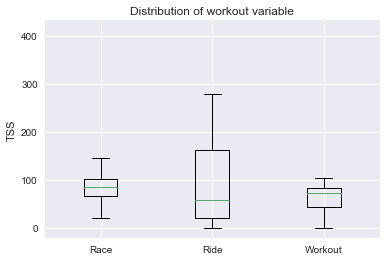

In [19]:
plt.boxplot(np.array([Race.TSS,Ride.TSS,work.TSS]),labels=["Race","Ride","Workout"])
plt.title("Distribution of workout variable")
plt.ylabel("TSS")
plt.show()

In [20]:
def plot_box(i,r,c,ax):
    ax[r,c].boxplot(np.array([Race[box_feat[i]],Ride[box_feat[i]],work[box_feat[i]]]),labels=["Race","Ride","Workout"])
    #ax[r,c].set_title("Workout distribution")
    ax[r,c].set_ylabel(box_feat[i])

c:\users\tarun\appdata\local\programs\python\python35\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


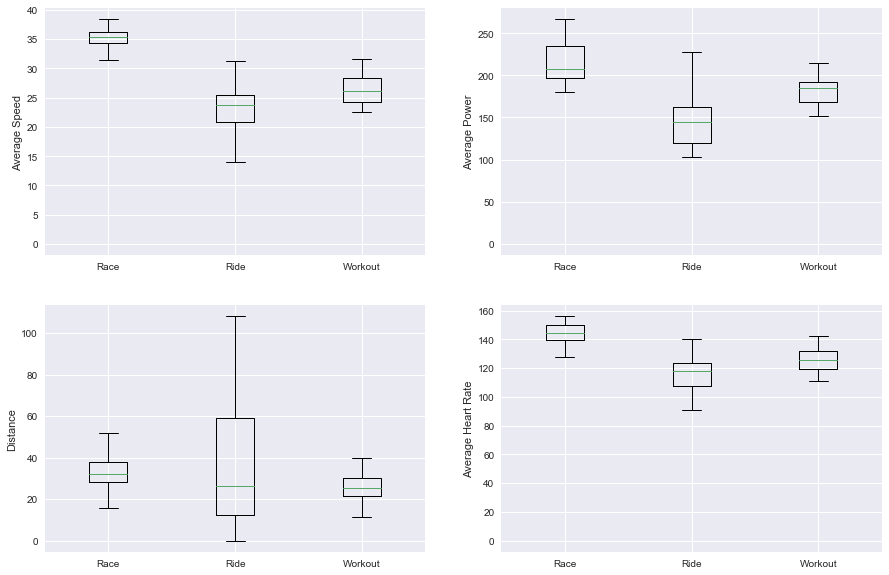

In [21]:
box_feat=["Average Speed","Average Power","Distance","Average Heart Rate"]
fig,ax=plt.subplots(2,2,figsize=(15, 10))
#plt.tight_layout() 
#print(ax)
r=0;c=0;
for i in range(len(scatter_feat)):
    plot_box(i,r,c,ax)
    c+=1
    if c==2:
        c=0;
        r+=1

__Observation__:
 - __Average Speed__: 
  - Race class has the highest median.
  - Ride class has the highest IQR(Inter quartile range)
 - __Average Power__:
  - Ride class has the highest IQR(Inter quartile range)
  - Race class has the highest median.

- __Distance__:
 - Ride class has the highest IQR(Inter quartile range)
 - Race class has the highest median.
- __Average Heartrate__:
 - Ride class has the highest IQR(Inter quartile range)
 - Race class has the highest median.

## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  



In [22]:
for i in range(len(data)):
    data["year"]=data.index.year
    data["month"]=data.index.month

In [33]:
distance=[]
print('The following data is the number of km ridden each month over the period of the data\n')
for i in data.index.year.unique():
    print("Year",i)
    for j in data.index.month.unique():
        n=data[(data["year"]==i)&(data["month"]==j)].Distance
        print("Year {} Distance covered in {} is {}".format(i,j,np.sum(n)))
        if len(n)==0:
            distance.append(0)
        else:
            distance.append(np.sum(n))

The following data is the number of km ridden each month over the period of the data

Year 2018
Year 2018 Distance covered in 1 is 72.5218
Year 2018 Distance covered in 2 is 501.4342
Year 2018 Distance covered in 3 is 538.8191999999999
Year 2018 Distance covered in 4 is 368.28139999999996
Year 2018 Distance covered in 5 is 339.53790000000004
Year 2018 Distance covered in 6 is 193.2489
Year 2018 Distance covered in 7 is 190.0591
Year 2018 Distance covered in 8 is 276.5732
Year 2018 Distance covered in 9 is 143.25920000000002
Year 2018 Distance covered in 10 is 450.0326
Year 2018 Distance covered in 11 is 743.2801000000001
Year 2018 Distance covered in 12 is 525.6188000000001
Year 2019
Year 2019 Distance covered in 1 is 422.838
Year 2019 Distance covered in 2 is 495.0122
Year 2019 Distance covered in 3 is 552.0932999999999
Year 2019 Distance covered in 4 is 640.4873000000001
Year 2019 Distance covered in 5 is 666.4823999999999
Year 2019 Distance covered in 6 is 466.1303
Year 2019 Distanc

In [34]:
tss=[]
print('The following data is the sum of TSS each month over the period of the data\n')
for i in data.index.year.unique():
    for j in data.index.month.unique():
        n=data[(data["year"]==i)&(data["month"]==j)].TSS
        print("Year {} Training stress score in {} is {}".format(i,j,np.sum(n)))
        if len(n)==0:
            tss.append(0)
        else:
            tss.append(np.sum(n))
#print(tss)

The following data is the sum of TSS each month over the period of the data

Year 2018 Training stress score in 1 is 114.8044
Year 2018 Training stress score in 2 is 1247.0274
Year 2018 Training stress score in 3 is 1426.2877
Year 2018 Training stress score in 4 is 1119.6002999999998
Year 2018 Training stress score in 5 is 718.8654
Year 2018 Training stress score in 6 is 586.4857999999999
Year 2018 Training stress score in 7 is 381.432
Year 2018 Training stress score in 8 is 650.2351
Year 2018 Training stress score in 9 is 347.4977
Year 2018 Training stress score in 10 is 1055.6187
Year 2018 Training stress score in 11 is 1938.1476
Year 2018 Training stress score in 12 is 1320.9535999999998
Year 2019 Training stress score in 1 is 1057.9363
Year 2019 Training stress score in 2 is 1269.9271999999999
Year 2019 Training stress score in 3 is 1611.9748
Year 2019 Training stress score in 4 is 1609.1063999999997
Year 2019 Training stress score in 5 is 1767.6982
Year 2019 Training stress score 

In [35]:
avg_speed=[]
print('The following data is the sum of Average speed each month over the period of the data\n')
for i in data.index.year.unique():
    print("Year",i)
    for j in data.index.month.unique():
        n=data[(data["year"]==i)&(data["month"]==j)]
        print("Year {} Average speed in {} is {}".format(i,j,np.sum(n["Average Speed"])))
        if len(n)==0:
            avg_speed.append(0)
        else:
            avg_speed.append(np.sum(n["Average Speed"]))

The following data is the sum of Average speed each month over the period of the data

Year 2018
Year 2018 Average speed in 1 is 74.14959999999999
Year 2018 Average speed in 2 is 359.2709
Year 2018 Average speed in 3 is 331.58680000000004
Year 2018 Average speed in 4 is 250.06619999999998
Year 2018 Average speed in 5 is 216.11459999999997
Year 2018 Average speed in 6 is 135.1855
Year 2018 Average speed in 7 is 88.2618
Year 2018 Average speed in 8 is 185.79520000000002
Year 2018 Average speed in 9 is 95.971
Year 2018 Average speed in 10 is 336.185
Year 2018 Average speed in 11 is 536.3048
Year 2018 Average speed in 12 is 344.62229999999994
Year 2019
Year 2019 Average speed in 1 is 304.63732999999996
Year 2019 Average speed in 2 is 406.9624
Year 2019 Average speed in 3 is 376.3791
Year 2019 Average speed in 4 is 495.65851
Year 2019 Average speed in 5 is 496.75210000000004
Year 2019 Average speed in 6 is 442.04810000000003
Year 2019 Average speed in 7 is 292.2194
Year 2019 Average speed i

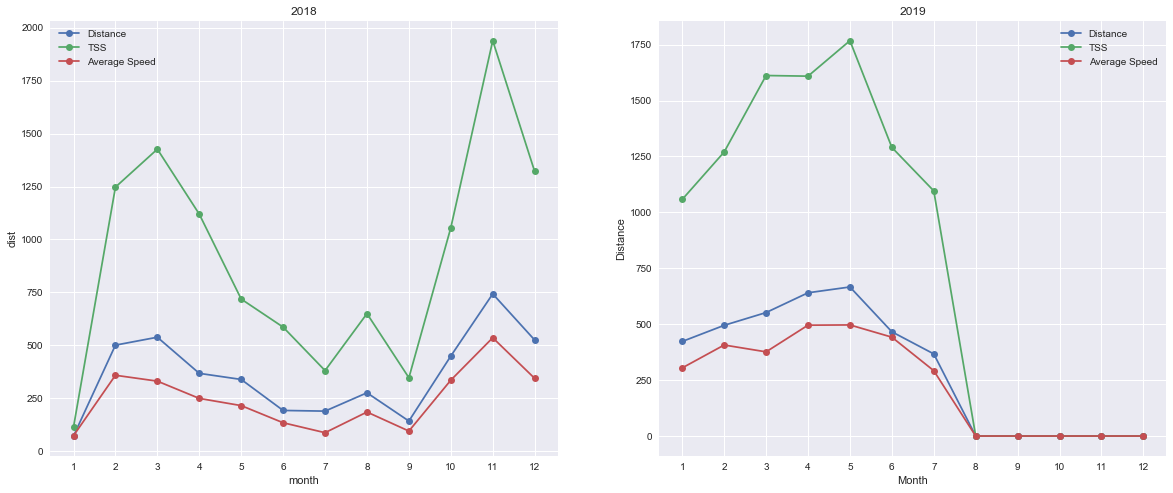

In [26]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
plt.setp(ax,xticks=range(1,13))
ax[0].plot(range(1,13),distance[0:12],'-o')
ax[0].plot(range(1,13),tss[0:12],'-o')
ax[0].plot(range(1,13),avg_speed[0:12],'-o')
ax[0].set_xlabel("month")
ax[0].set_ylabel("dist")
ax[0].set_title("2018")
ax[0].legend(["Distance","TSS","Average Speed"])
ax[1].plot(range(1,13),distance[12:25],'-o')
ax[1].plot(range(1,13),tss[12:25],'-o')
ax[1].plot(range(1,13),avg_speed[12:25],'-o')
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Distance")
ax[1].set_title("2019")
ax[1].legend(["Distance","TSS","Average Speed"])

__Observation__: By observing the above graph we can draw few conclusions and observe hidden insights about the distribution of Distance, TSS and Average speed over a period of data
- In 2018 the rise and decrease of the distribution looks identical for all the variables i.e Distance, TSS, Average Speed. The curve of  variables- Distance, TSS, Average Speed initially rises,fluctuates in between and finally drops at the end of the year.
- Unlike 2018 the distribution of variables in 2019 is not identical. TSS seems to dominate the other two variables in terms of magnitude. Tss peaked 1750 in the month of may and Average speed peaked 500 in the month of march.